In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Problema 1
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos:

Si el parametro color vale 1, la imagen debe mostrar activos ´unicamente el color azul. <br>
Si el parametro color vale 2, la imagen debe mostrar activos ´unicamente el color verde. <br>
Si el parametro color vale 3, la imagen debe mostrar activos ´unicamente el color rojo. <br>
Si el parametro color vale 10, la imagen debe mostrar activos ´unicamente los colores rojo y verde. <br>
Si el parametro color vale 20, la imagen debe mostrar activos ´unicamente los colores verde y azul. <br>
Si el parametro color vale 30, la imagen debe mostrar activos ´unicamente los colores azul y rojo. <br>

In [26]:
def colores (imagen, color):
    img = cv2.imread(imagen, cv2.COLOR_BGR2RGB)
    alto = img.shape[0]
    ancho = img.shape[1]

    mc = np.zeros((alto, ancho, 3))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            if color == 1:
                mc[i,j] = [0,0,blue]
            elif color == 2:
                mc[i,j] = [0,green,0]
            elif color == 3:
                mc[i,j] = [red,0,0]
            elif color == 10:
                mc[i,j] = [red,green,0]
            elif color == 20:
                mc[i,j] = [0,green,blue]
            elif color == 30:
                mc[i,j] = [red,0,blue]
    
    cv2.imwrite("monocromo.jpg", mc)
    mc = cv2.imread("monocromo.jpg")
    mc = cv2.cvtColor(mc, cv2.COLOR_BGR2RGB)
    plt.imshow(mc)
    plt.show()



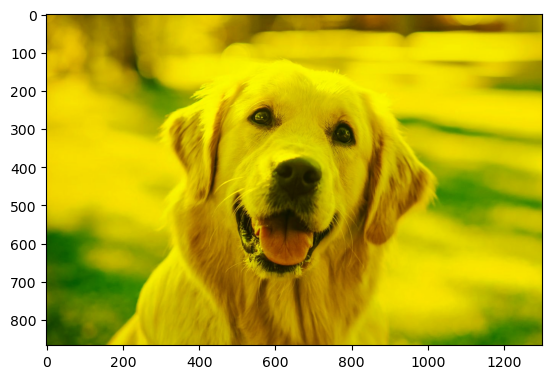

In [32]:
img = "perro.jpg"
colores(img, 20)

### Problema 2
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color.

In [56]:
def imagen_edg3d_rgb (edgazul, edgverde, edgrojo):
    gris_azul = cv2.imread(edgazul, cv2.IMREAD_GRAYSCALE)
    gris_verde = cv2.imread(edgverde, cv2.IMREAD_GRAYSCALE)
    gris_rojo = cv2.imread(edgrojo, cv2.IMREAD_GRAYSCALE)

    alto = gris_azul.shape[0]
    ancho = gris_azul.shape[1]

    rgb_new = np.zeros((alto, ancho, 3), dtype=np.uint8)
    rgb_new[:,:,0] =  gris_azul
    rgb_new[:,:,1] =  gris_verde
    rgb_new[:,:,2] =  gris_rojo

    cv2.imwrite("rgb_nueva.jpg", rgb_new)

In [57]:
gazul = "perro_salida_gray_azul.jpg"
gverde = "perro_salida_gray_verde.jpg"
grojo = "perro_salida_gray_rojo.jpg"

imagen_edg3d_rgb(gazul, gverde, grojo)



### Problema 3
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [46]:
def escala_de_grises_3d(imagen):
    img = cv2.imread(imagen)

    azul = img[:,:,0]
    verde = img[:,:,1]
    rojo = img[:,:,2]

    edg_azul = cv2.cvtColor(azul, cv2.COLOR_GRAY2BGR)
    edg_verde = cv2.cvtColor(verde, cv2.COLOR_GRAY2BGR)
    edg_rojo = cv2.cvtColor(rojo, cv2.COLOR_GRAY2BGR)

    cv2.imwrite("edg_azul.jpg", edg_azul)
    cv2.imwrite("edg_verde.jpg", edg_verde)
    cv2.imwrite("edg_rojo.jpg", edg_rojo)


In [47]:
string3 = "perro.jpg"
escala_de_grises_3d(string3)

### Problema 4
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media
de la distribucion.

In [126]:
def histogramas(imagen):
    histogramas = []
    medias = []

    for i in range(imagen.shape[2]):
        hist, _ = np.histogram(imagen[:, :, i], bins=256, range=[0, 256])
        media = np.mean(imagen[:, :, i])
        histogramas.append(hist)
        medias.append(media)

    imagen_edg = np.mean(imagen, axis=2).astype(np.uint8)
    hist_edg, _ = np.histogram(imagen_edg, bins=256, range=[0, 256])
    media_edg = np.mean(imagen_edg)

    fig, c = plt.subplots(2, 2, figsize=(12, 8))
    c = c.ravel()

    colores = ['r', 'g', 'b']
    
    for i in range(3):
        c[i].plot(histogramas[i], color=colores[i])
        c[i].axvline(medias[i], color='black')
        if colores[i] == 'r':
            c[i].set_title('Histograma Rojo')
        elif colores[i] == 'g':
            c[i].set_title('Histograma Verde')
        elif colores[i] == 'b':
            c[i].set_title('Histograma Azul')
        c[i].set_xlim([0, 255])

    #escala de grises
    c[3].plot(hist_edg, color='gray')
    c[3].axvline(media_edg, color="black")
    c[3].set_title('Escala de Grises')
    c[3].set_xlim([0, 255])

    plt.show()


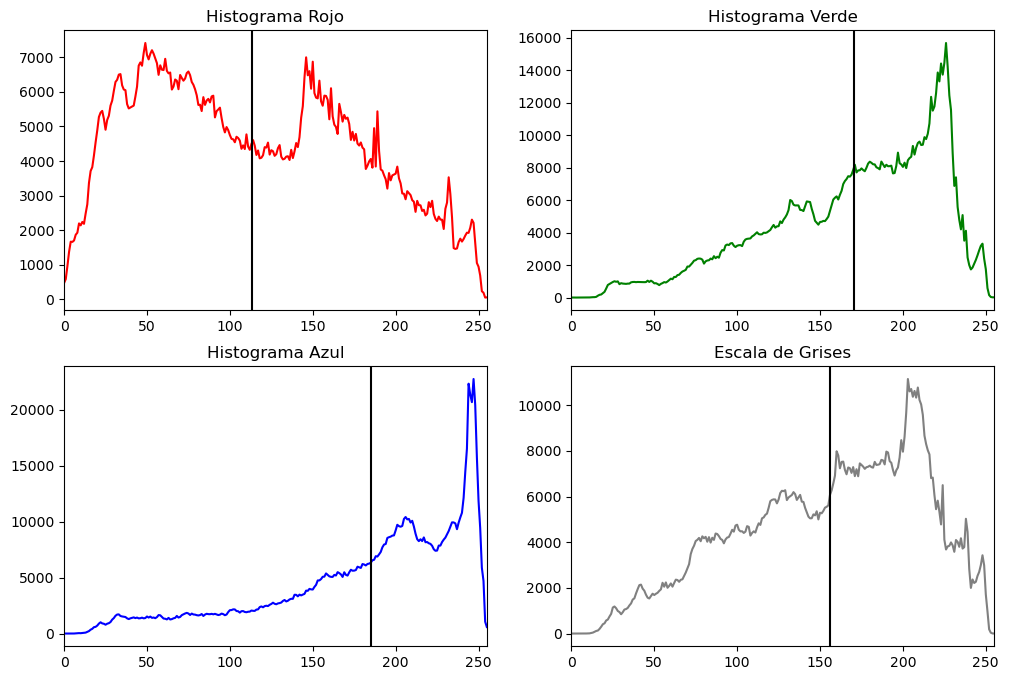

In [127]:
img = "perro.jpg" 
imagen = cv2.imread(img)

histogramas(imagen)

### Problema 5
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho especio, para entregar este ejercicio puede hacer con un archivo PDF.